Import import librarynya dan datanya

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import pickle
from imblearn.under_sampling import RandomUnderSampler

In [4]:
!pip install kaggle
kaggle_api = {
    "username" : "andiputrayana",
    "key" : "81061f70b057a29e30126c24d10de4f7"
}
with open("kaggle.json","w") as file:
  json.dump(kaggle_api, file)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease
!unzip personal-key-indicators-of-heart-disease.zip

Dataset URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
License(s): CC0-1.0
 23% 5.00M/21.4M [00:00<00:00, 46.7MB/s]
100% 21.4M/21.4M [00:00<00:00, 134MB/s] 
Archive:  personal-key-indicators-of-heart-disease.zip
  inflating: 2020/heart_2020_cleaned.csv  
  inflating: 2022/heart_2022_no_nans.csv  
  inflating: 2022/heart_2022_with_nans.csv  


Proses data cleaning nya

In [5]:
df = pd.read_csv('./2022/heart_2022_with_nans.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [6]:
heartdf = df.copy()
heartdf.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
heartdf.shape

(445132, 40)

Check yang NA

In [7]:
NA = heartdf.isnull().sum()
totalcell = np.product(heartdf.shape)
missing = NA.sum()
print(missing/totalcell*100)

5.0696478797300575


Clean yang NA

In [8]:
heartdf= heartdf.dropna()
NA = heartdf.isnull().sum()
totalcell = np.product(heartdf.shape)
missing = NA.sum()
print(missing/totalcell*100)

0.0


In [ ]:
heartdf.shape

(246022, 40)

In [ ]:
heartdf['Sex'].value_counts()

Sex
Female    127811
Male      118211
Name: count, dtype: int64

In [ ]:
heartdf['GeneralHealth'].value_counts()

GeneralHealth
Very good    86999
Good         77409
Excellent    41525
Fair         30659
Poor          9430
Name: count, dtype: int64

In [ ]:
heartdf['PhysicalActivities'].value_counts()

PhysicalActivities
Yes    191318
No      54704
Name: count, dtype: int64

In [ ]:
heartdf['SleepHours'].value_counts()

SleepHours
7.0     76447
8.0     69927
6.0     53981
5.0     16417
9.0     11859
4.0      6478
10.0     5468
3.0      1618
12.0     1476
2.0       740
1.0       563
11.0      339
16.0      155
15.0      154
14.0      148
18.0       83
13.0       79
20.0       50
24.0       13
17.0       11
23.0        6
19.0        5
22.0        5
Name: count, dtype: int64

In [ ]:
heartdf['HadHeartAttack'].value_counts()

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

In [ ]:
heartdf["HadAngina"].value_counts()

HadAngina
No     231069
Yes     14953
Name: count, dtype: int64

In [ ]:
heartdf["HadStroke"].value_counts()

HadStroke
No     235910
Yes     10112
Name: count, dtype: int64

In [ ]:
heartdf["HadDiabetes"].value_counts()

HadDiabetes
No                                         204834
Yes                                         33813
No, pre-diabetes or borderline diabetes      5392
Yes, but only during pregnancy (female)      1983
Name: count, dtype: int64

In [ ]:
heartdf["HadKidneyDisease"].value_counts()

HadKidneyDisease
No     234738
Yes     11284
Name: count, dtype: int64

In [ ]:
heartdf["SmokerStatus"].value_counts()

SmokerStatus
Never smoked                             147737
Former smoker                             68527
Current smoker - now smokes every day     21659
Current smoker - now smokes some days      8099
Name: count, dtype: int64

In [ ]:
heartdf["HadKidneyDisease"].value_counts()

HadKidneyDisease
No     234738
Yes     11284
Name: count, dtype: int64

In [ ]:
heartdf["AgeCategory"].value_counts()

AgeCategory
Age 65 to 69       28557
Age 60 to 64       26720
Age 70 to 74       25739
Age 55 to 59       22224
Age 50 to 54       19913
Age 75 to 79       18136
Age 80 or older    17816
Age 40 to 44       16973
Age 45 to 49       16753
Age 35 to 39       15614
Age 30 to 34       13346
Age 18 to 24       13122
Age 25 to 29       11109
Name: count, dtype: int64

In [ ]:
heartdf["BMI"].value_counts()

BMI
26.63    2727
27.46    2040
27.44    1964
24.41    1922
27.12    1893
         ... 
41.65       1
33.24       1
25.57       1
13.64       1
45.28       1
Name: count, Length: 3514, dtype: int64

In [ ]:
heartdf["AlcoholDrinkers"].value_counts()

AlcoholDrinkers
Yes    135307
No     110715
Name: count, dtype: int64

In [ ]:
heartdf["HadCOPD"].value_counts()

HadCOPD
No     227028
Yes     18994
Name: count, dtype: int64

In [ ]:
heartdf.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [ ]:
heartdf.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
heartdf.shape

(246022, 40)

Exploratory Data Analysis

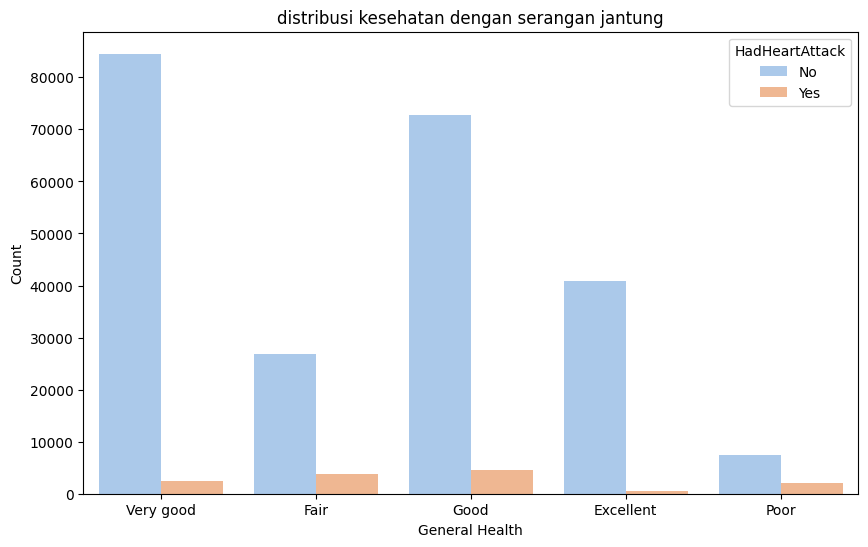

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='GeneralHealth', hue='HadHeartAttack', data=heartdf, palette='pastel')
plt.title('distribusi kesehatan dengan serangan jantung')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.show()


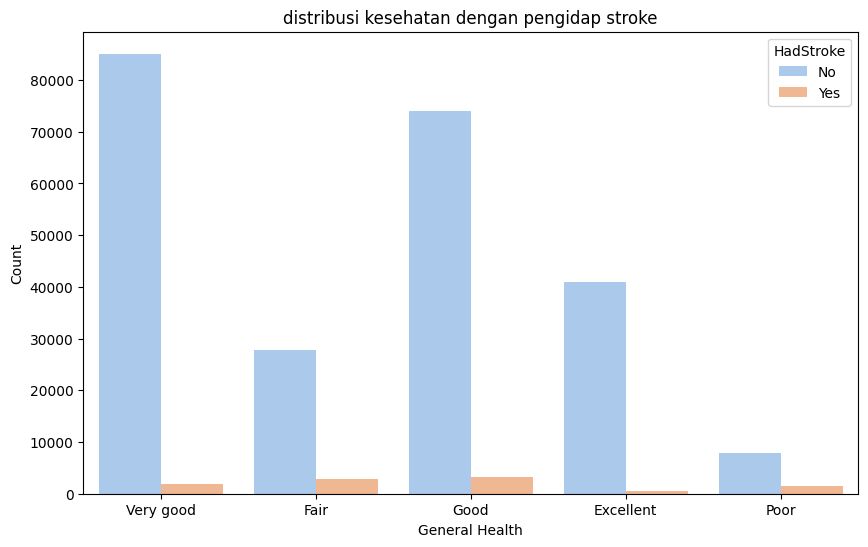

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='GeneralHealth', hue='HadStroke', data=heartdf, palette='pastel')
plt.title('distribusi kesehatan dengan pengidap stroke')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.show()


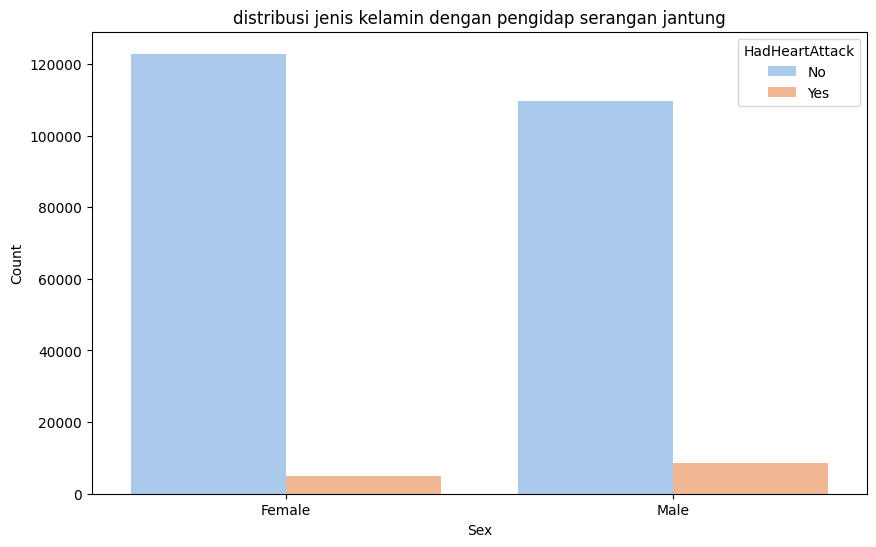

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='HadHeartAttack', data=heartdf, palette='pastel')
plt.title('distribusi jenis kelamin dengan pengidap serangan jantung')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


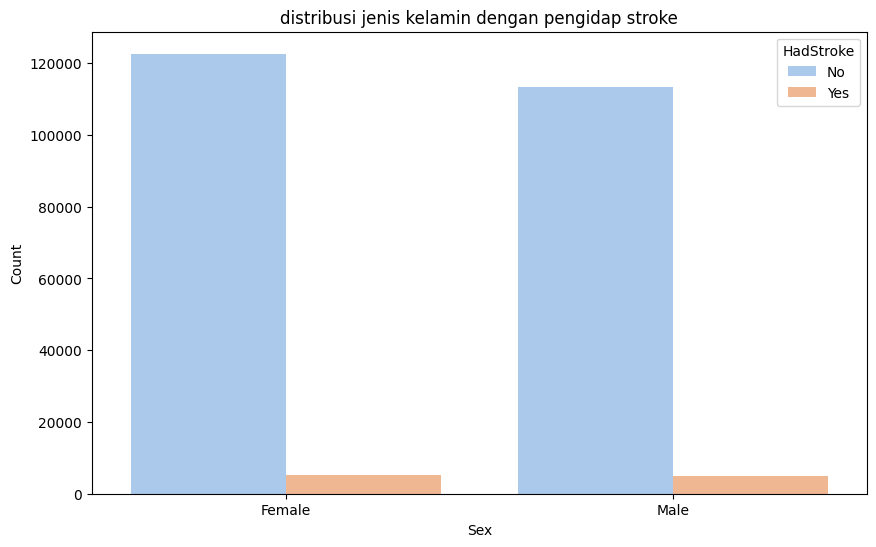

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='HadStroke', data=heartdf, palette='pastel')
plt.title('distribusi jenis kelamin dengan pengidap stroke')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


AI training

In [9]:
data = heartdf
target_heartattack = data['HadHeartAttack']
target_stroke = data['HadStroke']
features = data.drop(columns=['HadHeartAttack', 'HadStroke','State'])
numerical_features = features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = features.select_dtypes(include=[np.number]).columns.tolist()
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')
features[numerical_features] = numerical_imputer.fit_transform(features[numerical_features])
features[categorical_features] = categorical_imputer.fit_transform(features[categorical_features])
features = pd.get_dummies(features, drop_first=True)
random_state_value = 42
X_train, X_test, y_heartattack_train, y_heartattack_test = train_test_split(features, target_heartattack, test_size=0.2, random_state=random_state_value)
_, _, y_stroke_train, y_stroke_test = train_test_split(features, target_stroke, test_size=0.2, random_state=random_state_value)
smote = SMOTE(random_state=42)
X_heart_attack_train_smote, y_heart_attack_train_smote = smote.fit_resample(X_train, y_heartattack_train)
X_stroke_train_smote, y_stroke_train_smote = smote.fit_resample(X_train, y_stroke_train)

In [10]:
heartattack_model = RandomForestClassifier(random_state=42, class_weight='balanced')
heartattack_model.fit(X_heart_attack_train_smote, y_heart_attack_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [11]:
stroke_model = RandomForestClassifier(random_state=42 , class_weight='balanced')
stroke_model.fit(X_stroke_train_smote, y_stroke_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [12]:
y_heartattack_pred = heartattack_model.predict(X_test)
y_stroke_pred = stroke_model.predict(X_test)

In [14]:
print("Heart Attack Classification Report")
print(classification_report(y_heartattack_test, y_heartattack_pred))
print("Heart Attack Confusion Matrix")
print(confusion_matrix(y_heartattack_test, y_heartattack_pred))
print("Heart Attack ROC-AUC Score")
print(roc_auc_score(y_heartattack_test, heartattack_model.predict_proba(X_test)[:, 1]))

print("\nStroke Classification Report")
print(classification_report(y_stroke_test, y_stroke_pred))
print("Stroke Confusion Matrix")
print(confusion_matrix(y_stroke_test, y_stroke_pred))
print("Stroke ROC-AUC Score")
print(roc_auc_score(y_stroke_test, stroke_model.predict_proba(X_test)[:, 1]))

Heart Attack Classification Report
              precision    recall  f1-score   support

          No       0.97      0.97      0.97     46573
         Yes       0.47      0.41      0.44      2632

    accuracy                           0.94     49205
   macro avg       0.72      0.69      0.70     49205
weighted avg       0.94      0.94      0.94     49205

Heart Attack Confusion Matrix
[[45378  1195]
 [ 1562  1070]]
Heart Attack ROC-AUC Score
0.869186370457282

Stroke Classification Report
              precision    recall  f1-score   support

          No       0.96      0.99      0.98     47154
         Yes       0.24      0.07      0.11      2051

    accuracy                           0.95     49205
   macro avg       0.60      0.53      0.54     49205
weighted avg       0.93      0.95      0.94     49205

Stroke Confusion Matrix
[[46661   493]
 [ 1899   152]]
Stroke ROC-AUC Score
0.7906391326224329


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pickle

fitur = features.columns.tolist()
with open('features_revisifinal.pkl', 'wb') as f:
    pickle.dump(fitur, f)
with open('heartattack_revisifinal.pkl', 'wb') as f:
    pickle.dump(heartattack_model, f)
with open('stroke_revisifinal.pkl', 'wb') as f:
    pickle.dump(stroke_model, f)

In [18]:
import shutil


In [19]:
shutil.copy('stroke_revisifinal.pkl', '/content/drive/MyDrive/AI/')

'/content/drive/MyDrive/AI/stroke_revisifinal.pkl'

In [20]:
shutil.copy('heartattack_revisifinal.pkl', '/content/drive/MyDrive/AI/')

'/content/drive/MyDrive/AI/heartattack_revisifinal.pkl'

In [21]:
shutil.copy('features_revisifinal.pkl', '/content/drive/MyDrive/AI/')

'/content/drive/MyDrive/AI/features_revisifinal.pkl'

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2
